
# Exploratory Data Analysis

In [1]:
# Importing Libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler


In [2]:
#Loading Data
data= pd.read_json('data.json')

In [3]:
data

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
25998,34253,italian,"[wine, lemon, garlic cloves, fresh marjoram, c..."
25999,32565,french,"[fresh basil, fennel, fine sea salt, ice, larg..."
26000,16259,chinese,"[pepper, ginger, wonton wrappers, salt, green ..."
26001,40328,mexican,"[purple onion, vine ripened tomatoes, small wh..."


In [4]:

data.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [5]:
#describe method will only works for integer data
data.describe()

,id
count,26003.000000
mean,24871.213283
std,14361.720487
min,1.000000
25%,12362.000000
50%,24980.000000
75%,37356.500000
max,49716.000000


In [6]:
data['cuisine'].value_counts()

cuisine
italian         5129
mexican         4193
southern_us     2865
indian          1945
chinese         1728
french          1715
thai            1015
cajun_creole     988
japanese         941
greek            759
spanish          666
vietnamese       544
korean           542
moroccan         534
british          525
filipino         492
irish            433
jamaican         353
russian          336
brazilian        300
Name: count, dtype: int64

In [7]:
print("Number of cuisine categories: {}".format(len(data.cuisine.unique())))
data['cuisine'].unique()

Number of cuisine categories: 20


array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26003 entries, 0 to 26002
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           26003 non-null  int64 
 1   cuisine      26003 non-null  object
 2   ingredients  26003 non-null  object
dtypes: int64(1), object(2)
memory usage: 609.6+ KB


In [9]:
print('Maximum Number of Ingredients in a Dish: ',data['ingredients'].str.len().max())
print('Minimum Number of Ingredients in a Dish: ',data['ingredients'].str.len().min())

Maximum Number of Ingredients in a Dish:  65
Minimum Number of Ingredients in a Dish:  1


Text(0.5, 1.0, 'Total Number of recipes per cuisine')

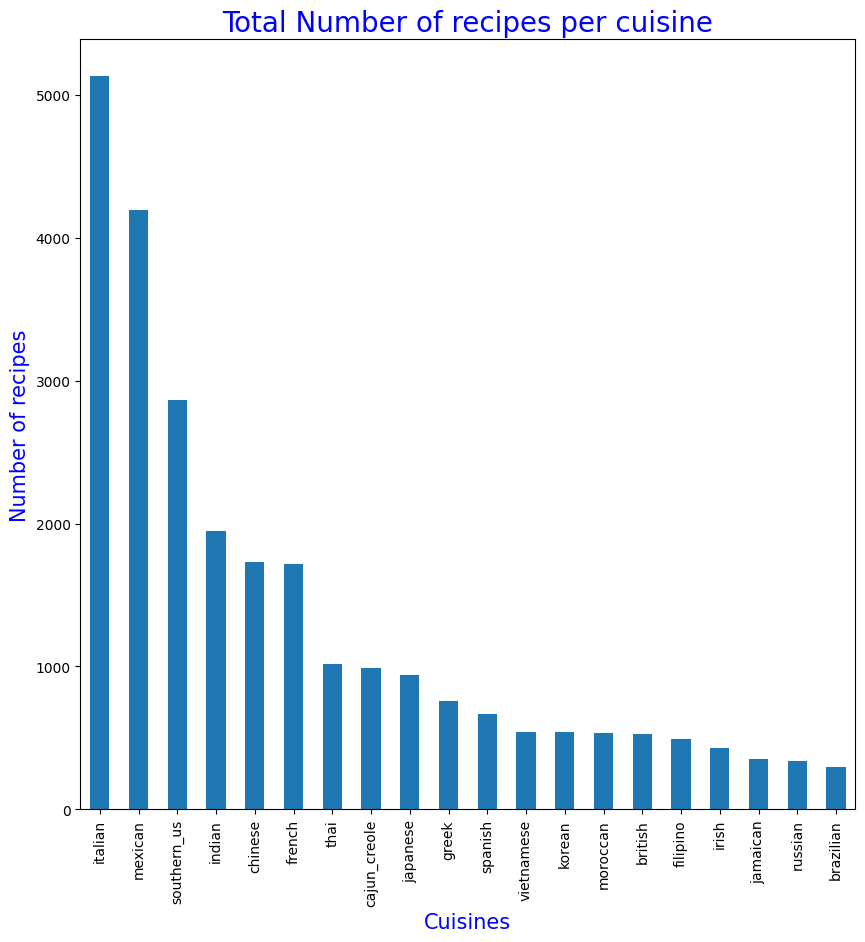

In [10]:
plt.figure(figsize=(10,10))
graph = data['cuisine'].value_counts().plot(kind='bar', rot=90, fontsize=10)


graph.set_xlabel('Cuisines', fontsize=15, color='blue')
graph.set_ylabel('Number of recipes', fontsize=15, color='blue')
graph.set_title('Total Number of recipes per cuisine', fontsize=20, color='blue')

Text(0.5, 1.0, 'Ingredients in a Dish Distribution')

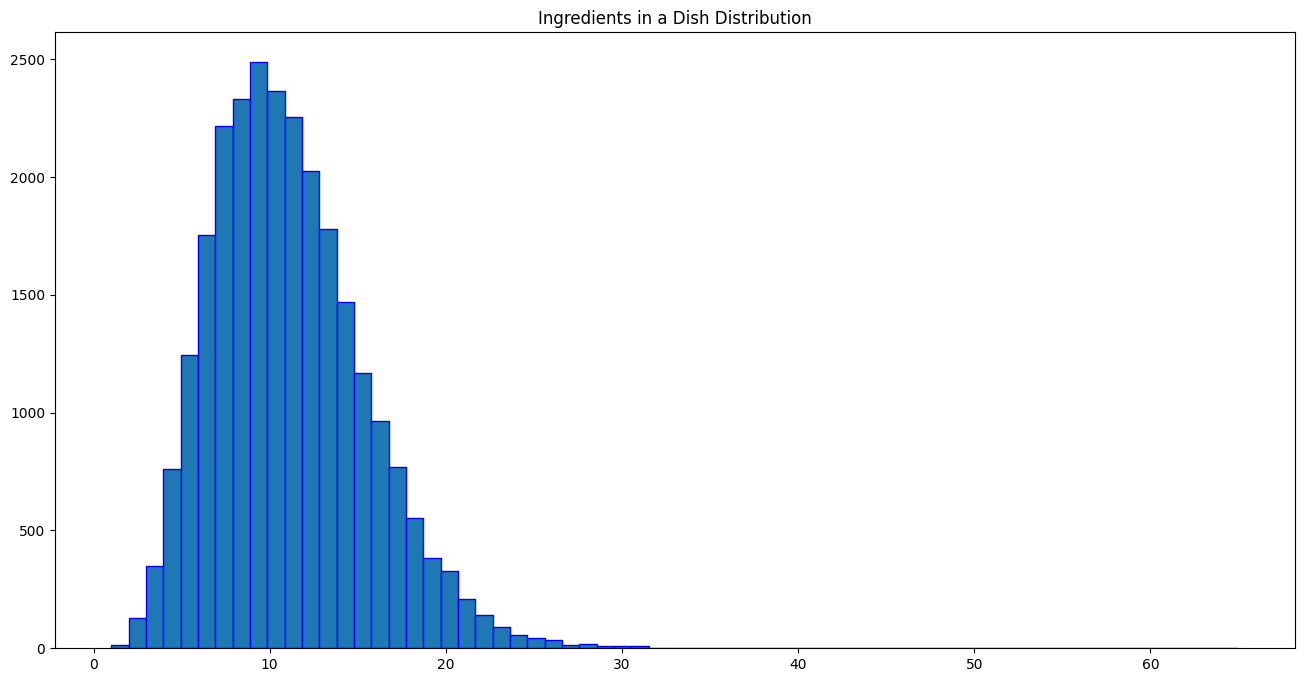

In [11]:
# The distribution of recipe length
plt.hist(data['ingredients'].str.len(),bins=max(data['ingredients'].str.len()),edgecolor='b')
plt.gcf().set_size_inches(16,8)
plt.title('Ingredients in a Dish Distribution')

Text(0.5, 1.0, 'Cuisine Distribution')

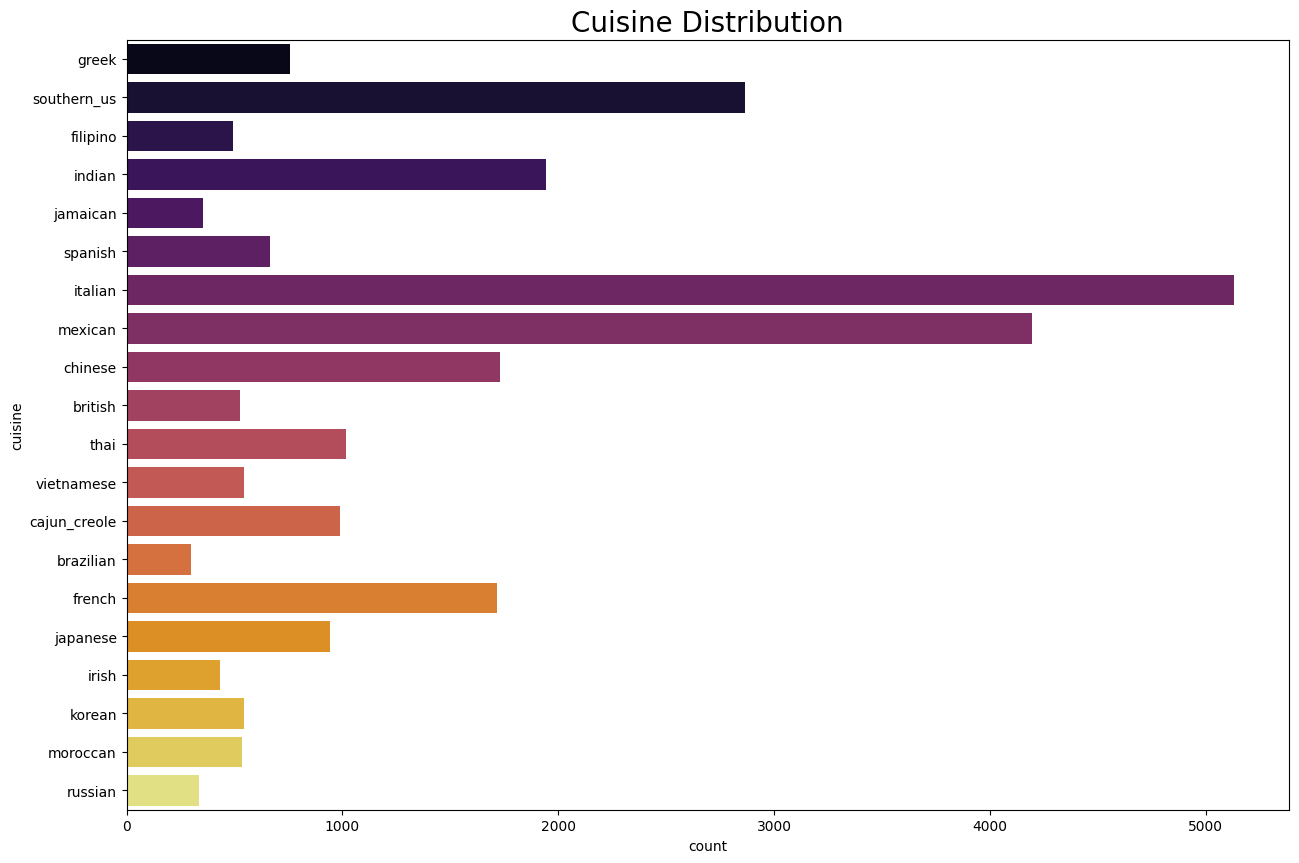

In [12]:
sns.countplot(y='cuisine', data=data,palette=sns.color_palette('inferno',20),hue='cuisine', dodge=False)
plt.legend([],[], frameon=False)
plt.gcf().set_size_inches(15,10)
plt.title('Cuisine Distribution',size=20)

In [13]:
data.notnull()

,id,cuisine,ingredients
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True
...,...,...,...
25998,True,True,True
25999,True,True,True
26000,True,True,True
26001,True,True,True


# Data Pre-Processing

In [14]:
#Data To Vector_Class 

class DataToVec():
    def __init__(self, data):
        self.data = self.datacleaning(data)
    
    def datacleaning(self, data):
        df = data
        df['ingredients'] = [' '.join(map(str, l)) for l in df['ingredients']]
        return self.preprocessing(df)
    
    def preprocessing(self, df):
        # Tokenization
        cv = CountVectorizer()
        X = cv.fit_transform(df['ingredients'])

        data = pd.DataFrame(X.toarray(), columns= cv.get_feature_names_out())
        data.drop([col for col, val in data.sum().items() if int(val)<=10 or col.isnumeric()], axis=1, inplace=True)
        data['label'] = df['cuisine']
       
        return data

In [15]:
obj = DataToVec(data)
obj.data

,achiote,acting,active,added,adobo,agave,aged,ajwain,ale,alfredo,...,yoghurt,yogurt,yolks,york,yukon,zest,zesty,ziti,zucchini,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,greek
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,southern_us
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,filipino
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,indian
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,italian
25999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,french
26000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,chinese
26001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mexican


## Train Test Split

In [16]:
shuffled_data = obj.data

In [65]:
shuffled_data = shuffled_data.sample(frac=1, random_state=42)
shuffled_data = pd.DataFrame(shuffled_data, columns=shuffled_data.columns)

X = shuffled_data.loc[:, shuffled_data.columns != 'label']
y = shuffled_data['label']

# Splitting the data into training and testing sets
X_train_forLib, X_test_forLib, y_train_forLib, y_test_forLib = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# OneHot encode the labels
oneHot_encoder = OneHotEncoder(sparse_output=False)
y_oneHot = oneHot_encoder.fit_transform(y.to_numpy().reshape(-1,1))




In [69]:
scaler = MinMaxScaler()

X_train_scaled_forLib = scaler.fit_transform(X_train_forLib)
X_test_scaled_forLib = scaler.transform(X_test_forLib)

In [67]:
X_train_forLib.shape

(20802, 1262)

In [68]:
y_train_forLib.shape

(20802,)

# Modeling

### Logistic Regression - Multinomial

#### Self

In [55]:
class LogisticRegression_self:
  def __init__(self, l2_reg=0.01, lr=0.01, max_iter=1000):
    self.loss_step = None
    self.w = None
    self.b = None
    self.l2_reg = l2_reg
    self.lr = lr
    self.max_iter = max_iter

  def fit(self, X, y_oneHot):
    self.loss_step, self.w, self.b = self.gradient_descent(X, y_oneHot)
  
  def loss_plot(self):
    plt.figure()
    plt.plot(self.loss_step['step'], self.loss_step['loss'])
    plt.xlabel('Step')
    plt.ylabel('Loss')
    plt.title('Loss over iterations')
    plt.show()

  
  def predict(self, X):
    self.z = np.dot(X, self.w) + self.b
    p = self._softmax(self.z)
    return np.argmax(p, axis=1)

  def cross_entropy_loss(self, y):
    # probabilities corresponding to the true labels
    softmax_clipped = np.clip(self.p, 1e-7, 1-1e-7)
    correct_class_probs = softmax_clipped[np.arange(len(y)), np.argmax(y, axis=1)]

    # L2 regularization term
    l2_term = 0.5 * self.l2_reg * np.sum(self.w ** 2)
    loss = np.mean(-np.log(correct_class_probs)) + l2_term
    return loss
  
  def gradient(self, X, y_oneHot):
    self.z = np.dot(X, self.w) + self.b
    self.p = self._softmax(self.z)

    gd_w = np.dot(X.T, (self.p - y_oneHot)) / X.shape[0] + self.l2_reg * self.w / X.shape[0]
    gd_b = np.sum(self.p - y_oneHot, axis=0) / X.shape[0]

    return gd_w, gd_b
  
  def gradient_descent(self, X, y_oneHot):
    self.w = np.random.normal(0, 0.1, (X.shape[1], y_oneHot.shape[1]))  # Xavier initialization for weight
    self.b = np.zeros((1, y_oneHot.shape[1]))
    step = 0
    final_step = []
    final_loss = []

    while step < self.max_iter:
      step += 1
      gd_w, gd_b = self.gradient(X,y_oneHot)
      self.w -= self.lr * gd_w
      self.b -= self.lr * gd_b
      if step % 100 == 0 or step == 1:
        loss = self.cross_entropy_loss(y_oneHot)
        final_step.append(step)
        final_loss.append(loss)
        # print(f"Step {step}, Loss: {loss}")

    df = pd.DataFrame({
      'step' : final_step,
      'loss' : final_loss
    })

    return df, self.w, self.b

  def _softmax(self, z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)
   
  def accuracy(self, X, y):
        y_pred = self.predict(X)
        y_true = np.argmax(y, axis=1)
        accuracy = np.mean(y_pred == y_true)
        return accuracy

Fold 1


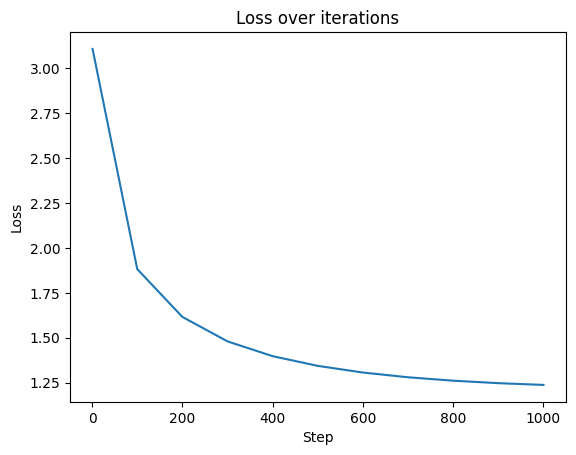

Training Accuracy: 73.77%
Validation Accuracy: 69.87%
Test Accuracy: 71.00%
Fold 2


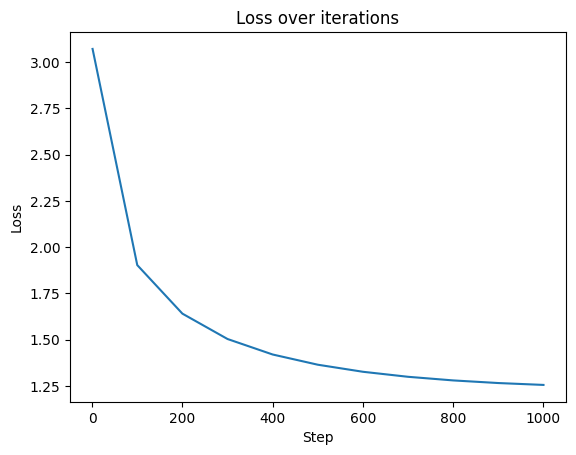

Training Accuracy: 73.61%
Validation Accuracy: 70.32%
Test Accuracy: 72.41%
Fold 3


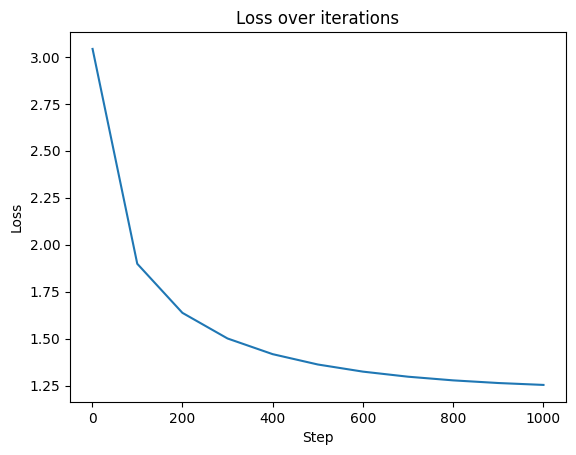

Training Accuracy: 73.46%
Validation Accuracy: 70.48%
Test Accuracy: 70.01%
Fold 4


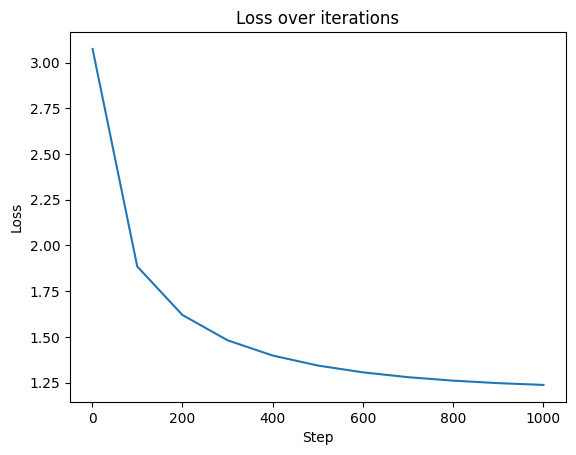

Training Accuracy: 74.00%
Validation Accuracy: 70.29%
Test Accuracy: 71.48%
Fold 5


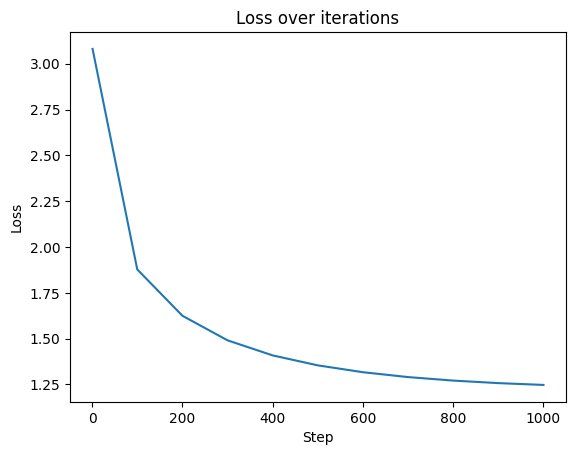

Training Accuracy: 73.53%
Validation Accuracy: 70.96%
Test Accuracy: 71.13%


In [94]:

# Initializing KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

train_accuracies = []
val_accuracies = []
test_accuracies = []
true_labels = []
predictions = []

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}")

    # Splitting into training and test for this fold
    X_train_full, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train_full, y_test = y_oneHot[train_index], y_oneHot[test_index]
    
    # Further splitting training data into training and validation (70-15-15)
    X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.3, stratify=y_train_full, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, stratify=y_val, random_state=42)

    # Scaling the data
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    # Training the model
    model = LogisticRegression_self(l2_reg=5e-4, max_iter=1000, lr=0.8)
    model.fit(X_train_scaled, y_train)

    # Plotting the loss for this fold
    model.loss_plot()

    # Calculating accuracies
    train_accuracy = model.accuracy(X_train_scaled, y_train)
    val_accuracy = model.accuracy(X_val_scaled, y_val)
    test_accuracy = model.accuracy(X_test_scaled, y_test)

    print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
    print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

    # Predicting on the test set for this fold
    y_pred = model.predict(X_test_scaled)
    
    # Appending true labels and predictions for computing overall classification report
    true_labels.extend(np.argmax(y_test, axis=1))
    predictions.extend(y_pred)

    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)


In [99]:
# Average accuracies over all folds
avg_train_accuracies = np.mean(train_accuracies) * 100
avg_val_accuracies = np.mean(val_accuracies) * 100
avg_test_accuracies = np.mean(test_accuracies) * 100
print(f"Average Training Accuracy: {avg_train_accuracies:.2f}%")
print(f"Average Validation Accuracy: {avg_val_accuracies:.2f}%")
print(f"Average Test Accuracy: {avg_test_accuracies:.2f}%")

# Calculating and print the classification report
print("Classification Report:")
avg_cls_report = classification_report(true_labels, predictions)
print(avg_cls_report)


Average Training Accuracy: 73.68%
Average Validation Accuracy: 70.38%
Average Test Accuracy: 71.21%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.04      0.08       179
           1       0.64      0.11      0.19       313
           2       0.78      0.58      0.66       595
           3       0.71      0.85      0.77      1038
           4       0.87      0.28      0.43       294
           5       0.53      0.51      0.52      1030
           6       0.83      0.46      0.59       455
           7       0.83      0.86      0.84      1168
           8       0.51      0.10      0.17       259
           9       0.70      0.91      0.79      3079
          10       0.76      0.41      0.53       211
          11       0.88      0.57      0.69       566
          12       0.81      0.62      0.70       325
          13       0.83      0.91      0.87      2517
          14       0.86      0.60      0.71       319
          15

### From Library

In [119]:
# Importing models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

#### Logistic Regression

In [120]:
LR = LogisticRegression(max_iter=1000)

In [121]:
LR.fit(X_train_scaled_forLib, y_train_forLib)
y_pred_lr = LR.predict(X_test_scaled_forLib)

In [122]:
LR_accuracy = accuracy_score(y_test_forLib,y_pred_lr) * 100
print(f"LR Accuracy: {LR_accuracy:.2f}%")
cls_report_LR = classification_report(y_test_forLib, y_pred_lr)
print(cls_report_LR)

LR Accuracy: 77.25%
              precision    recall  f1-score   support

   brazilian       0.75      0.45      0.56        60
     british       0.51      0.38      0.44       105
cajun_creole       0.78      0.64      0.71       198
     chinese       0.78      0.87      0.82       346
    filipino       0.69      0.56      0.62        98
      french       0.60      0.64      0.62       343
       greek       0.81      0.70      0.75       152
      indian       0.84      0.89      0.87       389
       irish       0.65      0.52      0.58        87
     italian       0.79      0.89      0.83      1026
    jamaican       0.87      0.57      0.69        70
    japanese       0.76      0.74      0.75       188
      korean       0.87      0.70      0.78       108
     mexican       0.90      0.93      0.92       839
    moroccan       0.81      0.70      0.75       107
     russian       0.71      0.37      0.49        67
 southern_us       0.67      0.77      0.72       573
     sp

#### K-Nearest Neighbor

In [123]:
knn_classifier = KNeighborsClassifier(n_neighbors=23)
knn_classifier.fit(X_train_scaled_forLib, y_train_forLib)

# Predict the labels for the test data
y_pred_knn = knn_classifier.predict(X_test_scaled_forLib)
print("Predictions:", y_pred_knn)


Predictions: ['mexican' 'mexican' 'japanese' ... 'mexican' 'mexican' 'russian']


In [124]:
KNN_accuracy = accuracy_score(y_test_forLib,y_pred_knn) * 100
print(f"KNN Accuracy: {KNN_accuracy:.2f}%")
cls_report_KNN = classification_report(y_test_forLib, y_pred_knn)
print(cls_report_KNN)

KNN Accuracy: 62.39%
              precision    recall  f1-score   support

   brazilian       0.51      0.32      0.39        60
     british       0.53      0.20      0.29       105
cajun_creole       0.63      0.32      0.43       198
     chinese       0.67      0.75      0.71       346
    filipino       0.55      0.55      0.55        98
      french       0.35      0.52      0.42       343
       greek       0.67      0.49      0.56       152
      indian       0.73      0.76      0.74       389
       irish       0.51      0.44      0.47        87
     italian       0.65      0.80      0.72      1026
    jamaican       0.60      0.39      0.47        70
    japanese       0.84      0.64      0.73       188
      korean       0.73      0.54      0.62       108
     mexican       0.64      0.89      0.75       839
    moroccan       0.79      0.21      0.34       107
     russian       0.67      0.06      0.11        67
 southern_us       0.63      0.60      0.61       573
     s

#### Random Forest

In [125]:
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train_scaled_forLib, y_train_forLib)
y_pred_rfc = rfc.predict(X_test_scaled_forLib)

In [126]:
RF_accuracy = accuracy_score(y_test_forLib,y_pred_rfc) * 100
print(f"RF Accuracy: {RF_accuracy:.2f}%")
cls_report_RF = classification_report(y_test_forLib, y_pred_rfc)
print(cls_report_RF)

RF Accuracy: 74.77%
              precision    recall  f1-score   support

   brazilian       0.69      0.40      0.51        60
     british       0.80      0.23      0.36       105
cajun_creole       0.80      0.62      0.70       198
     chinese       0.75      0.90      0.82       346
    filipino       0.71      0.50      0.59        98
      french       0.57      0.50      0.53       343
       greek       0.80      0.64      0.71       152
      indian       0.82      0.90      0.86       389
       irish       0.73      0.40      0.52        87
     italian       0.70      0.92      0.80      1026
    jamaican       0.91      0.41      0.57        70
    japanese       0.86      0.68      0.76       188
      korean       0.93      0.71      0.81       108
     mexican       0.84      0.94      0.89       839
    moroccan       0.85      0.64      0.73       107
     russian       0.79      0.22      0.35        67
 southern_us       0.65      0.74      0.69       573
     sp

#### SVM

In [127]:
svm = SVC(kernel='linear', C=1, decision_function_shape='ovr')  # 'ovr' is one-vs-rest strategy
svm.fit(X_train_scaled_forLib, y_train_forLib)
y_pred_svm = svm.predict(X_test_scaled_forLib)


In [128]:
SVM_accuracy = accuracy_score(y_test_forLib,y_pred_svm) * 100
print(f"SVM Accuracy: {SVM_accuracy:.2f}%")
cls_report_SVM = classification_report(y_test_forLib, y_pred_svm)
print(cls_report_SVM)

SVM Accuracy: 76.31%
              precision    recall  f1-score   support

   brazilian       0.59      0.58      0.59        60
     british       0.41      0.37      0.39       105
cajun_creole       0.74      0.68      0.71       198
     chinese       0.79      0.87      0.83       346
    filipino       0.65      0.60      0.62        98
      french       0.56      0.64      0.59       343
       greek       0.72      0.70      0.71       152
      indian       0.85      0.90      0.88       389
       irish       0.61      0.55      0.58        87
     italian       0.79      0.86      0.82      1026
    jamaican       0.88      0.63      0.73        70
    japanese       0.76      0.74      0.75       188
      korean       0.86      0.70      0.78       108
     mexican       0.90      0.91      0.91       839
    moroccan       0.82      0.75      0.78       107
     russian       0.60      0.31      0.41        67
 southern_us       0.71      0.73      0.72       573
     s

# Summary

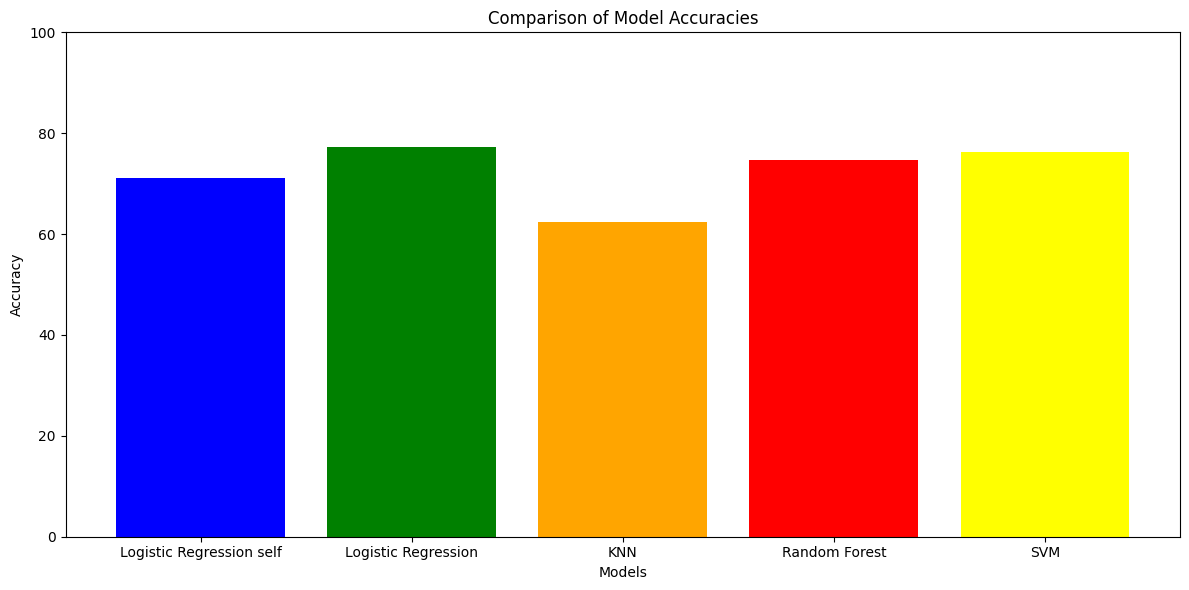

In [130]:
# Plotting accuracies of Self Logistic regression and other models for comparison

accuracies = [avg_test_accuracies ,LR_accuracy, KNN_accuracy, RF_accuracy, SVM_accuracy]
models = ['Logistic Regression self', 'Logistic Regression', 'KNN', 'Random Forest', 'SVM']

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(range(len(models)), accuracies, color=['blue', 'green', 'orange', 'red', 'yellow'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 100)
plt.xticks(range(len(models)), models, rotation=0) 
plt.tight_layout()

# Display the plot
plt.show()